Original file is located at
    https://colab.research.google.com/drive/1bbnd8zMkBpTnOa3CT-oIAARMFnlpSo4E

Identify a large 2-node network dataset—you can start with a dataset in a repository.  
    Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
    Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
    What can you infer about each of the distinct groups?

You may work in a small group on the project.

Your code and analysis should be delivered in an IPython Notebook by end of day Sunday.

## Project 2: DATA 620

### by: The p < 0.05 Team - Haig Bedros, Noori Selina, Julia Ferris, Matthew Roland

Tasks: 
1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?


<u>Task 1</u>

The dataset used in this project is titled "affiliations_1996," and the original data is located at the following website: https://github.com/JeffreyAlanSmith/Integrated_Network_Science/blob/master/data/affiliations_1996.txt

In this dataset, each row is a student, and each column is a club. 0 indicates the student is not in the club. 1 indicates the student is in the club. First, the data will be explored for general information. Below, the data is imported as a data frame.


In [2]:
import pandas as pd

# Path to your .tab file
file_path = 'https://raw.githubusercontent.com/juliaDataScience-22/project2-620/main/affiliations_1996.txt'

# Read .tab file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows of the DataFrame
print(df.head())

# Source: https://github.com/JeffreyAlanSmith/Integrated_Network_Science/blob/master/data/affiliations_1996.txt

        Academic decathalon  Art Club  Asian Club  Band, 8th  Band, Jazz  \
101498                    0         0           0          0           0   
104452                    0         0           0          0           0   
104456                    0         0           0          0           0   
104462                    0         0           0          0           0   
104471                    0         0           0          0           0   

        Band, Marching (Symphonic)  Baseball, JV (10th)  Baseball, V  \
101498                           0                    0            0   
104452                           1                    0            0   
104456                           0                    0            0   
104462                           0                    0            0   
104471                           0                    0            0   

        Basketball, boys 8th  Basketball, boys 9th  ...  Track, girls 8th  \
101498                     0     

Next, the data will be explored.

All the variables are binary, indicating whether or not a student was in a certain club. 91 clubs are included in the dataset. 1,295 students are included in the dataset.

This section checks for missing values. Based on the results, it does not contain any null values.

In [6]:
print(df.isnull().sum())
any_null = df.isnull().any().any()
if any_null:
    print("\nThis data set has null values.")
else:
    print("\nThis data set does not have any null values.")

Academic decathalon      0
Art Club                 0
Asian Club               0
Band, 8th                0
Band, Jazz               0
                        ..
Volleyball, V            0
Wrestling, 8th           0
Wrestling, V             0
Yearbook Contributors    0
Yearbook Editors         0
Length: 91, dtype: int64

This data set does not have any null values.


The graphs below show the number of students in each club.

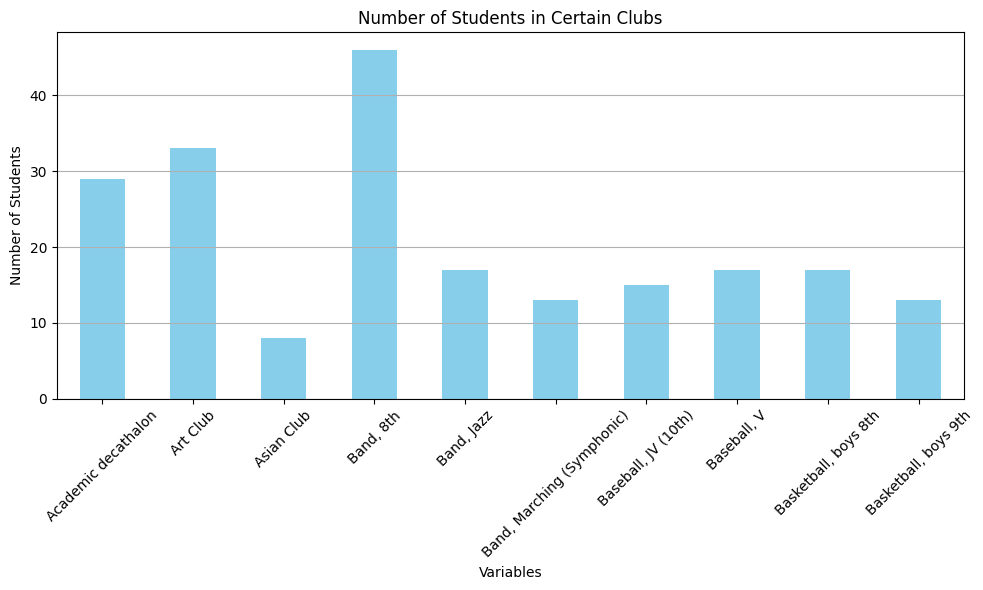

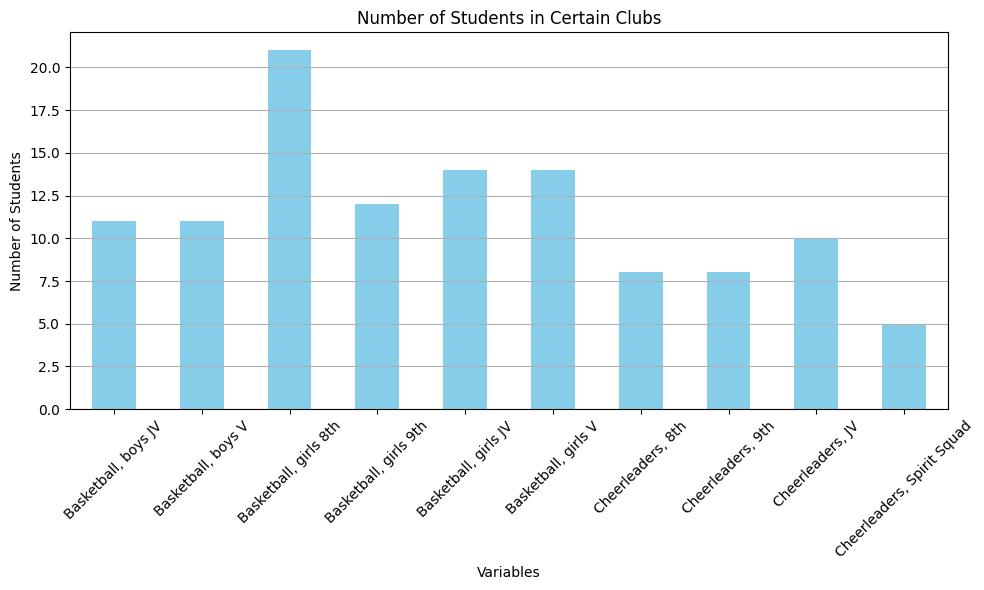

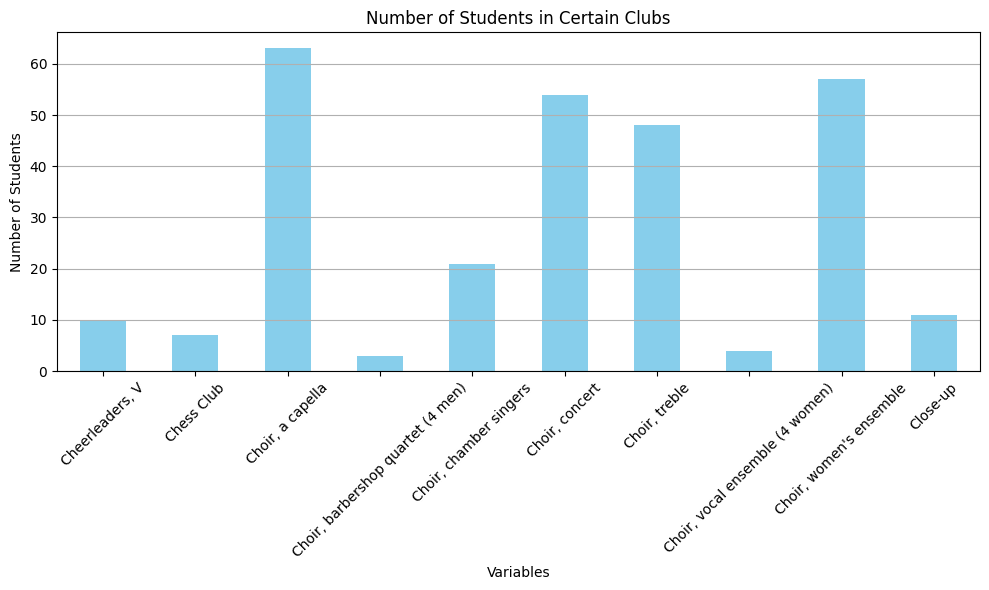

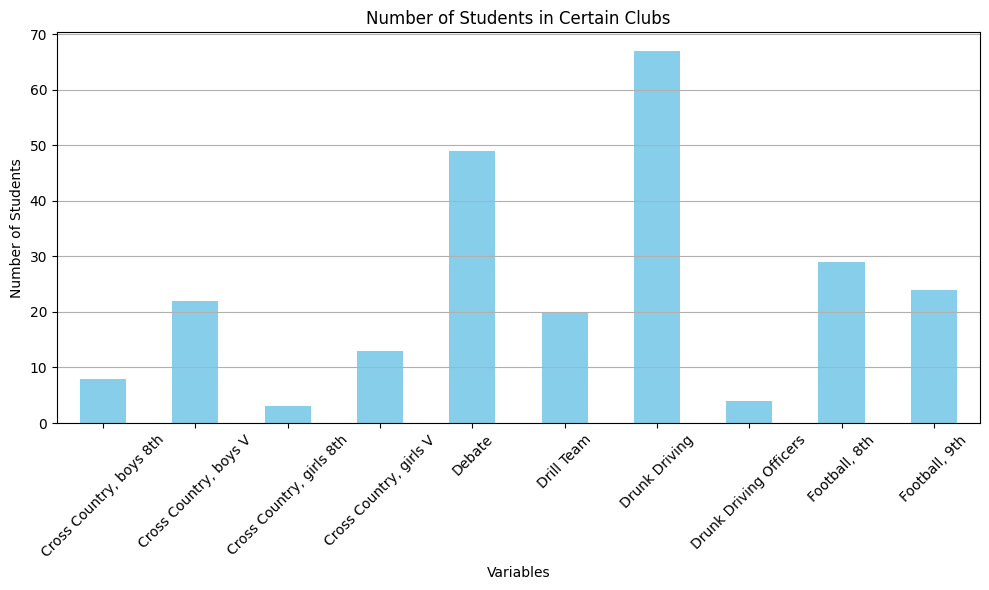

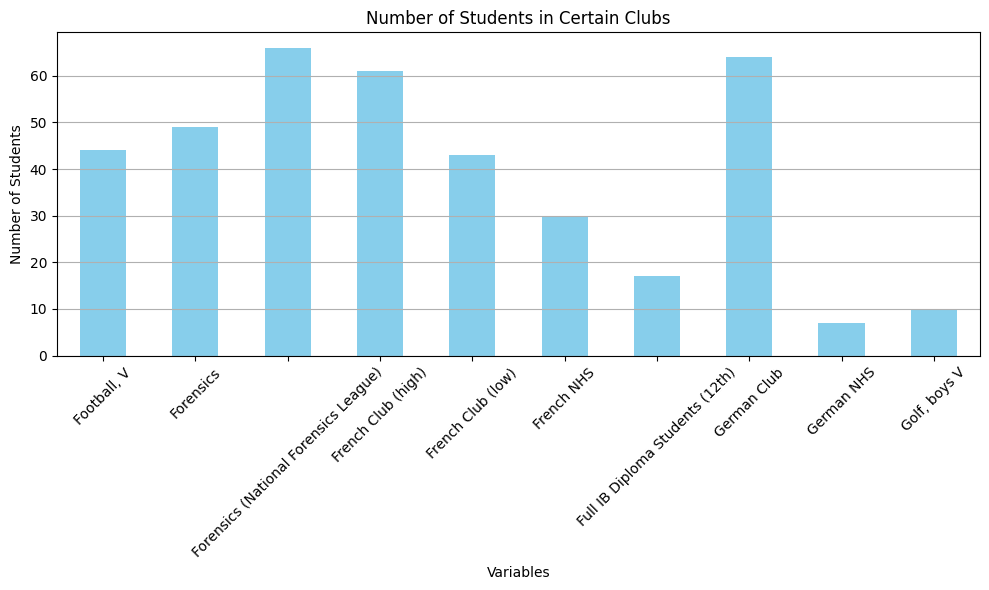

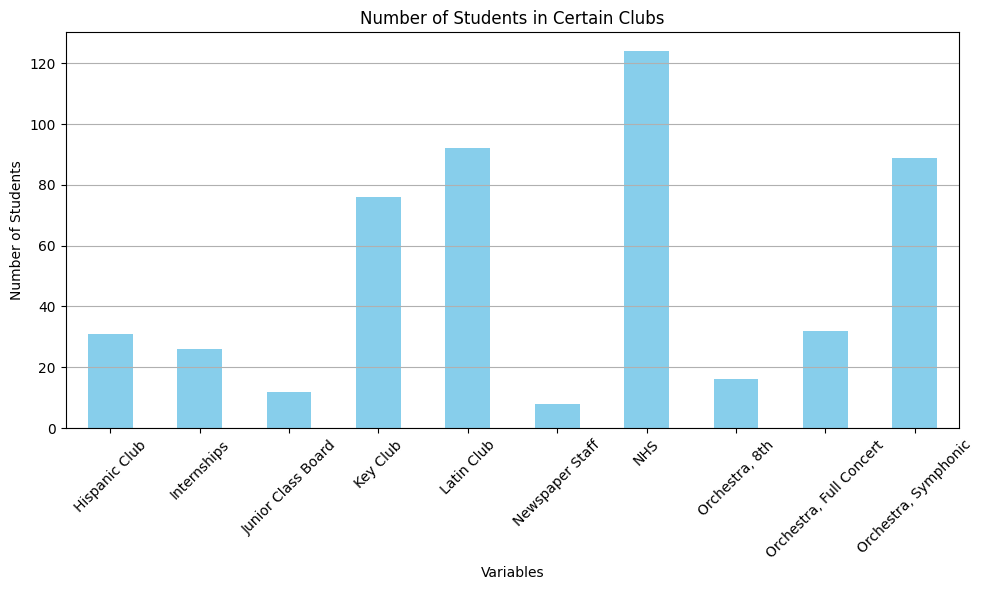

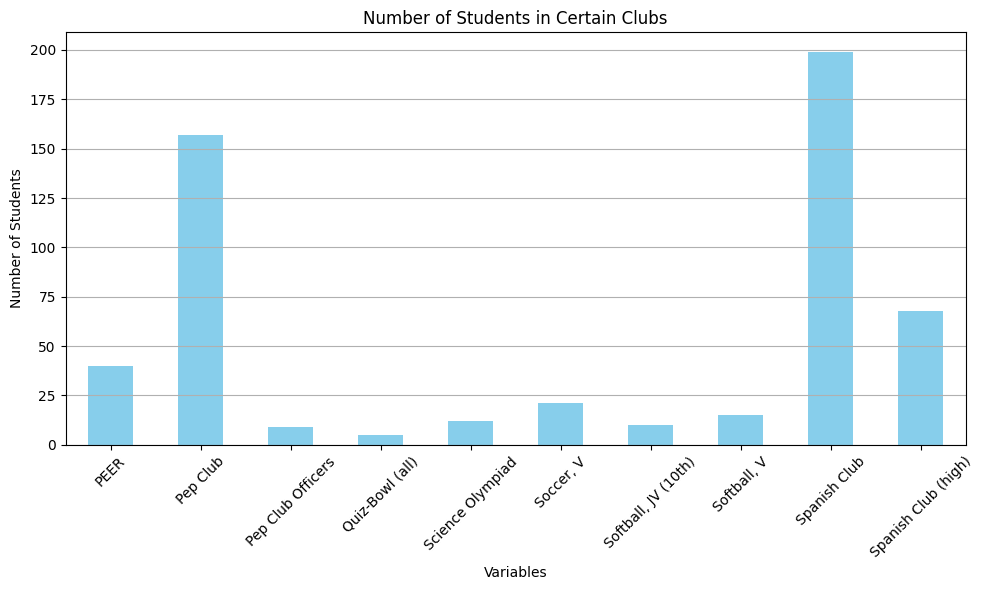

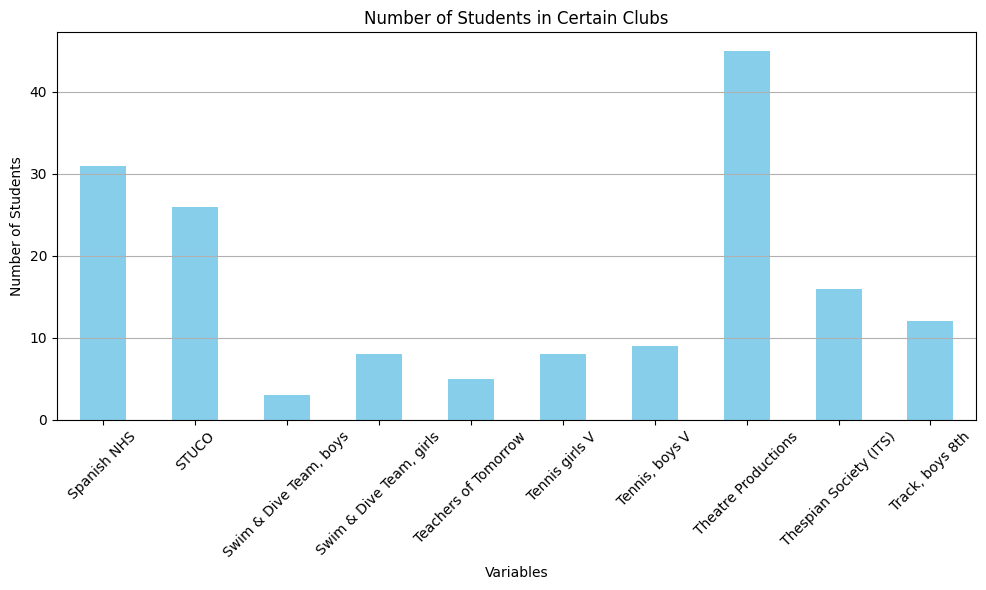

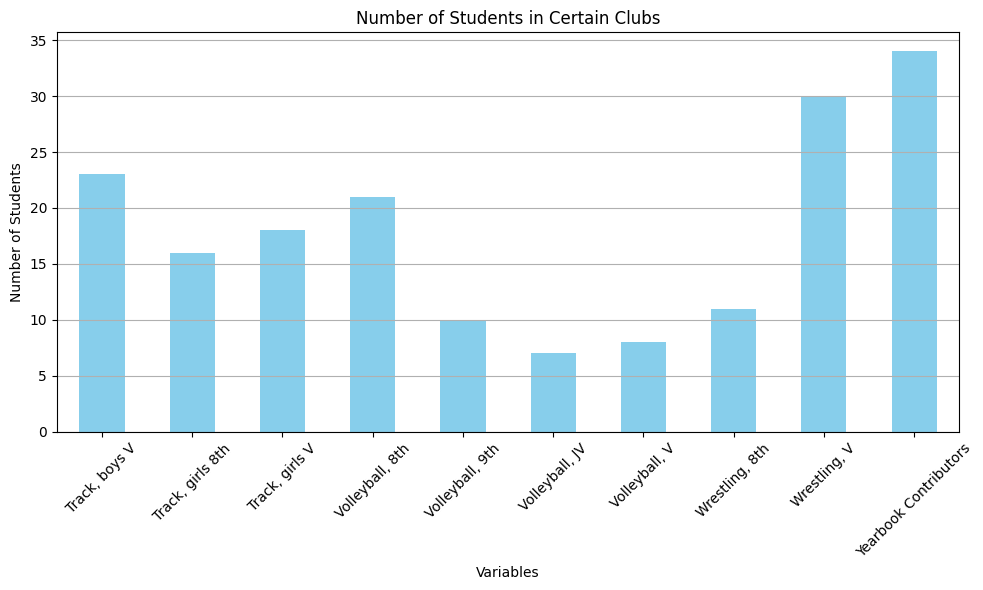

In [14]:
import matplotlib.pyplot as plt

# Number of variables per chart
variables_per_chart = 10

# Calculate number of charts needed
num_charts = len(df.columns) // variables_per_chart
if len(df.columns) % variables_per_chart != 0:
    num_charts += 1

# Plotting each group of 10 variables
for i in range(num_charts - 1):
    if(i == 9):
        start_idx = i * variables_per_chart
        end_idx = start_idx + variables_per_chart + 1
        subset_df = df.iloc[:, start_idx:end_idx]
    else:
        start_idx = i * variables_per_chart
        end_idx = start_idx + variables_per_chart
        subset_df = df.iloc[:, start_idx:end_idx]
    
    # Count occurrences of 1 for each subset
    counts = (subset_df == 1).sum()
    
    # Plotting the bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Number of Students in Certain Clubs')
    plt.xlabel('Variables')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.grid(axis='y')  # Add grid lines on y-axis
    plt.tight_layout()
    plt.show()


## Interpretation of the Data Overview
### Data Sample

    Columns: Clubs

### Data Information

    Entries: 1,295 students
    Missing Values: No missing values.
    Data Types: All binary values.

### Students Per Club

    Add anything here? Or take this out since the charts are above?


Edit below for this new data.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt


g = nx.Graph()

for index, row in data.iterrows():
    g.add_node(row['ID'], gender=row['SEX'], age=row['AGE'], years_no_hypertension=row['DLIT_AG'], time_to_hospital=row['TIME_B_S'], lethal_outcome=row['LET_IS'])

for node1 in g.nodes(data=True):
    for node2 in g.nodes(data=True):
        if node1 != node2 and node1[1]['age'] == node2[1]['age']:
            g.add_edge(node1[0], node2[0])

pos = nx.spring_layout(g)  # Use 'g' instead of 'G'
nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_color='black')

labels = {node: f"{node}\nGender: {data['gender']}\nAge: {data['age']}" for node, data in g.nodes(data=True)}
nx.draw_networkx_labels(g, pos, labels=labels, font_color='red')

plt.show()

NameError: name 'nx' is not defined